# Plant Disease Classification - Load Trained Model

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

(256, 256, 3)


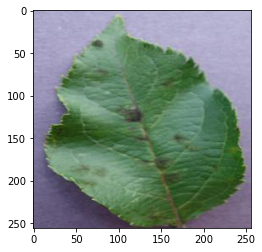

In [2]:
my_data_dir = 'C:\\plant_diseases'
os.listdir(my_data_dir)

# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'

test_path = my_data_dir+'\\valid\\'
train_path = my_data_dir+'\\train\\'

os.listdir(test_path)

os.listdir(train_path)

os.listdir(train_path+'\\Apple___Apple_scab')[0]

apple_scab = train_path+'\\Apple___Apple_scab\\' + '00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

apple_scab_img = imread(apple_scab)
plt.imshow(apple_scab_img)

image_shape = apple_scab_img.shape
print(image_shape)

In [3]:
print(apple_scab_img.max())
print(apple_scab_img.min())

print(len(os.listdir(train_path+'\\Apple___Apple_scab\\')))
print(len(os.listdir(train_path + '\\Peach___healthy\\')))
print(len(os.listdir(test_path+'\\Apple___Apple_scab\\')))
print(len(os.listdir(test_path + '\\Peach___healthy\\')))

226
0
2016
1728
504
432


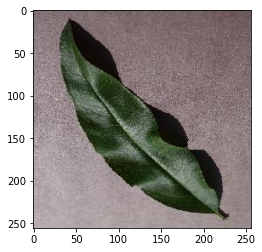

In [4]:
plt.imshow(imread(train_path + '\\Peach___healthy\\' + '017d3d86-12bf-4280-8929-10dcd504ac46___Rutg._HL 3671.JPG'))

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

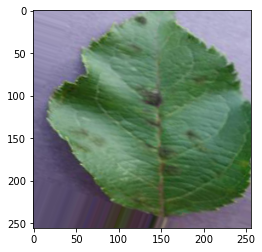

In [6]:
plt.imshow(image_gen.random_transform(apple_scab_img))

In [7]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

from tensorflow.keras.models import load_model
model = load_model("plant_disease_classifier.h5")

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        9

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

batch_size = 16

train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [50]:
df = pd.DataFrame(train_image_gen.class_indices.items())
df.rename(columns={1:"Index", 0:"Class Name"}, inplace=True)
df.set_index(inplace=True, keys="Index")
df

,Class Name
Index,
0,Apple___Apple_scab
1,Apple___Black_rot
2,Apple___Cedar_apple_rust
3,Apple___healthy
4,Blueberry___healthy
5,Cherry_(including_sour)___Powdery_mildew
6,Cherry_(including_sour)___healthy
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
8,Corn_(maize)___Common_rust_


In [51]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
model.evaluate_generator(test_image_gen)

[0.2500211298465729, 0.9166856408119202]

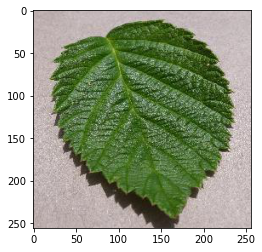

In [52]:
from tensorflow.keras.preprocessing import image
image_to_predict = image.load_img('C:\\plant_diseases\\post_train_testing\\raspberry.JPG', target_size=(256,256))
image_to_predict = np.expand_dims(image_to_predict, axis=1)
image_to_predict = image_to_predict.reshape(256, 256, 3)
image_to_predict = image_to_predict / 256
plt.imshow(image_to_predict)

In [53]:
pred_probabilities = model.predict(image_to_predict.reshape(1, 256, 256, 3))

In [54]:
pred_probabilities

array([[6.71282941e-17, 1.66407839e-14, 6.40157305e-15, 4.56620491e-10,
        7.25481897e-11, 8.26555835e-24, 1.20732062e-11, 4.77041108e-19,
        2.17191309e-28, 1.13800604e-26, 4.85954773e-26, 1.70101010e-12,
        2.95345241e-11, 6.76008849e-09, 7.43953121e-09, 1.77620852e-23,
        7.30245023e-19, 3.24626072e-17, 1.63903418e-12, 1.64604094e-10,
        1.46093993e-17, 9.24507866e-12, 4.07270704e-07, 9.99774277e-01,
        5.45071193e-12, 6.01812211e-17, 3.44102857e-15, 2.25400785e-04,
        1.85876775e-16, 4.49463600e-12, 7.12864656e-09, 2.38989089e-11,
        2.49954585e-10, 1.87539806e-09, 1.52804658e-10, 1.35349590e-13,
        7.47092041e-11, 7.61156644e-17]], dtype=float32)

In [55]:
predictions = [np.argmax(i) for i in pred_probabilities]
for i, j in enumerate(train_image_gen.class_indices):
    if (predictions[0] == i):
        print(j)

Raspberry___healthy
